# Student ID: 2412780

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807: Assignment . You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_1`, `test_1` for   and `train_2`, `test_2` for training and testing. This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code block/function`, you must have a `text block` which explain what code block/function is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './data/number/', where number is last digit of your student_id folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './model/student_id/Model_1/' and './model/student_id/Model_2/'.
*   at testing time you will load models from './model/student_id/Model_1/' and './model/student_id/Model_2/' . Your output file based on the test file will be named “test.csv” and you will add/modify “out_label_model_1” and “out_label_model_2” column in the existing columns from test.csv. These outputs will be generated from your trained models.
*  after testing, your output file will be named “test.csv” and you will add/modify “out_label_model_1” and “out_label_model_2” column in the existing columns from test.csv. These outputs will be generated from your trained models.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [31]:
!pip install transformers

Let's import all require libraries.
For example, `numpy`

In [32]:
import numpy as np
import os
import pickle
import pandas as pd

**Let's put your student id as a variable, that you will use different places**

In [33]:
student_id = 2412780 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [34]:
# set same seeds for all libraries

#numpy seed
np.random.seed(2412780)

train_1()
test_1()
train_2()
test_2()

# Common Codes

In this section you will write all common codes, for examples


*   Data read
*   Command Line argument reading
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 12345670

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-25-SU/Assignment/’ in your GDrive

now set all global variable,


Sample output directory and file structure:    

In [35]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [36]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = './CE807-25-SU/TA assignment/'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['code.ipynb', 'report.pdf', 'data', 'model']


In [37]:
DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '17') # Make sure to replace 0 with your data id
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)

Train file:  gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/train.csv
Validation file:  gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/valid.csv
Test file:  gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/test.csv


In [38]:
# Read train Data
train_df = pd.read_csv(train_file)
train_df.head()

,id,data_id,text,rating
0,417653,17,This sensor is just what I needed. After a fre...,5
1,465857,17,"Did it work in the Kuerig? Yes, it brewed but ...",1
2,122904,17,"First off, it does make ice. It takes its swee...",2
3,666209,17,I was so happy to see the drip pans for a gas ...,1
4,131486,17,Easy to use and easy to clean,5


In [39]:
# Read Validation Data
val_df = pd.read_csv(val_file)
val_df.head()

,id,data_id,text,rating
0,426817,17,Great replacement knobs for my GE range! They ...,5
1,383450,17,Great item for winter! Quick delivery!,5
2,517794,17,"It arrived brand new, and even tho the box was...",4
3,320190,17,"Easy change, perfect fit. Very good filtration...",5
4,54912,17,"I had reservations at first, but once I got th...",5


In [40]:
# Read Test Data
test_df = pd.read_csv(test_file)
test_df.head()

,id,data_id,text,out_label_model_1,out_label_model_2,processed
0,59521,17,Do not waste your money on this icemaker it is...,1,2,wast money icemak worth mine last three week s...
1,338141,17,We loved how the mini Keurig fit perfectly int...,5,5,love mini keurig fit perfectli bag love color ...
2,644955,17,6 month into the service live of this heater. ...,5,5,month servic live heater forgotten well dryer ...
3,555237,17,Quality product for less $$. Fast shipping.,5,5,qualiti product less fast ship
4,41960,17,Readily fit our Kerig machine and the price is...,5,5,readili fit kerig machin price right


In [41]:
# taken from Lab 09
def read_data(file_name):
  df = pd.read_csv(file_name)
  print(file_name, 'has', len(df),'data points')
  return df

In [42]:
test_df = read_data(test_file)

gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/test.csv has 1386 data points


In [43]:
MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model', str(2412780)) # Make sure to use your student Regitration number
MODEL_1_DIRECTORY = os.path.join(MODEL_PATH, 'model_1')
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_2_DIRECTORY = os.path.join(MODEL_PATH, 'model_2')
print('Model 2 directory: ', MODEL_2_DIRECTORY)

os.makedirs(MODEL_1_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_2_DIRECTORY, exist_ok=True)

Model 1 directory:  gdrive/MyDrive/./CE807-25-SU/TA assignment/model/2412780/model_1
Model 2 directory:  gdrive/MyDrive/./CE807-25-SU/TA assignment/model/2412780/model_2


# Method 1 Start

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


Here in this block we are importing all the necessary libraries used throughout the project for data preprocessing,modeling,evaluation and visualization


*   Joblib : This library is used for saving the machine learning model
*   Re : This is used for data preprocessing to work with Regular Expression
*   nltk: Natural Language Toolkit is used for removing stopwords and stemming
*   stopwords : Common English word are filtered from the text using this
*   PorterStemmer : This tool used for reducing words to their stem
*   sklearn.linear_model.LogisticRegression : This is used to build logistic regression model
*   sklearn.metrics: Tools to evaluate model performance.
*   classification_report, accuracy_score: For detailed performance metrics.
*   confusion_matrix, ConfusionMatrixDisplay: To visualize classification errors.
*   sklearn.feature_extraction.text.TfidfVectorizer: Converts text data into numerical feature vectors using TF-IDF.
*   matplotlib.pyplot: For visualizing data and model results (e.g., confusion matrix).
*   BertTokenizer, BertModel: For using BERT (pretrained transformer model) to convert text into contextual embeddings.
*   torch: PyTorch library, required to use BERT models and tensors.
*   tqdm: tqdm is used for displaying progress bars during long-running operations (like BERT embedding generation)
*   os: Used for interacting with the operating system (e.g., file paths).























In [44]:
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report, accuracy_score
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
import os





In this part of the code we are preparing  the tools  and functions  needed to clean raw data into a format that is suitable for machine learning.First we are downloading alist of common english words like the , is , and  which dont add much meaning . We also set up the Porter Stemmer, which helps reduce words to their base form . next we define preprocess_text that takes the sentence and perform various cleaning steps converting it to lowercase, removing punctuation and numbers using regular expressions, breaking it into individual words, removing the stopwords, and finally applying stemming to each word ,next we define two additional functions for transforming the cleaned text into numerical features using the TF-IDF method. The fit_vectorizer function is used during training to learn the most important words from the data (up to 5000 by default) and convert the text into feature vectors. The transform_text function is used to convert new or test data into the same vector format using the trained TF-IDF mode which confirms that the text is properly processed  and ready for training and testing

In [45]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


In [47]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()  # simple whitespace tokenizer
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)


In [48]:
def fit_vectorizer(texts, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(texts)
    return X, vectorizer

def transform_text(texts, vectorizer):
    return vectorizer.transform(texts)


## Training 1 Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

**This function train_method1 builds a machine learning pipeline that trains a text classification model using traditional techniques  TF-IDF for text feature extraction and Logistic Regression for classification.the preprocessed training data is converted into numerical features using TF-IDF with the fit_vectorizer function, and the same vectorizer is used to transform the validation data for consistency. It then initializes a Logistic Regression model, trains it on the vectorized training data, and evaluates its performance by printing the accuracy and a classification report for both the training and validation sets.Finally, the trained model and TF-IDF vectorizer are saved to the specified directory so they can be reused later without retraining. This whole process is wrapped inside a single function to keep everything organized and reusable.**

In [49]:
def train_method1(train_file, val_file, model_dir, student_id=2412780):

    print("Reading files...")
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    print("Preprocessing text...")
    train_df['processed'] = train_df['text'].apply(preprocess_text)
    val_df['processed'] = val_df['text'].apply(preprocess_text)

    print("Vectorizing using TF-IDF...")
    X_train, vectorizer = fit_vectorizer(train_df['processed'])
    X_val = transform_text(val_df['processed'], vectorizer)

    y_train = train_df['rating']
    y_val = val_df['rating']

    print("Training Logistic Regression...")
    clf = LogisticRegression(max_iter=1000, random_state=student_id)
    clf.fit(X_train, y_train)

    # Training Performance
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_acc:.4f}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))

    #  Validation Performance
    y_pred = clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    print(f"\nValidation Accuracy: {val_acc:.4f}")
    print("Validation Classification Report:")
    print(classification_report(y_val, y_pred))

    # Confusion Matrix
    print("Plotting Confusion Matrix...")
    cm = confusion_matrix(y_val, y_pred, labels=[1, 2, 3, 4, 5])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
    disp.plot(cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix - Validation Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    print("Saving model and vectorizer...")
    os.makedirs(model_dir, exist_ok=True)
    joblib.dump(clf, os.path.join(model_dir, 'logistic_model1.pkl'))
    joblib.dump(vectorizer, os.path.join(model_dir, 'tfidf_vectorizer.pkl'))
    print("Training complete.")


Reading files...
Preprocessing text...
Vectorizing using TF-IDF...
Training Logistic Regression...
Training Accuracy: 0.7802
Training Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.72      0.76       670
           2       1.00      0.03      0.06       218
           3       0.94      0.11      0.19       276
           4       0.89      0.16      0.27       501
           5       0.77      1.00      0.87      3249

    accuracy                           0.78      4914
   macro avg       0.88      0.40      0.43      4914
weighted avg       0.81      0.78      0.72      4914


Validation Accuracy: 0.7200
Validation Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.48      0.56        95
           2       0.00      0.00      0.00        31
           3       1.00      0.05      0.10        39
           4       0.50      0.03      0.05        72
           5       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


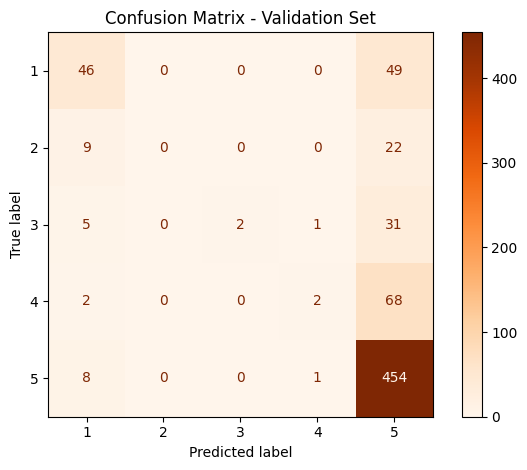

Saving model and vectorizer...
Training complete.


In [50]:
train_method1(train_file, val_file, MODEL_1_DIRECTORY, student_id=2412780)

## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

***This function loads the trained model and TF-IDF vectorizer, preprocesses the test data, makes predictions, and saves the results (with predicted labels) to a new CSV out_label_model_1 ***

In [51]:
def test_method1(test_file, model_dir, output_file):
    print("Loading model and vectorizer...")
    model = joblib.load(os.path.join(model_dir, 'logistic_model1.pkl'))
    vectorizer = joblib.load(os.path.join(model_dir, 'tfidf_vectorizer.pkl'))

    print("Reading test file...")
    test_df = pd.read_csv(test_file)

    print("Preprocessing test text...")
    test_df['processed'] = test_df['text'].apply(preprocess_text)
    X_test = transform_text(test_df['processed'], vectorizer)

    print("Predicting test labels...")
    test_df['out_label_model_1'] = model.predict(X_test)

    print("Saving updated test.csv...")
    test_df.to_csv(output_file, index=False)
    print("Done. Predictions saved to:", output_file)


In [52]:
test_file = os.path.join(DATA_PATH, 'test.csv')
test_method1(test_file, MODEL_1_DIRECTORY, test_file)


Loading model and vectorizer...
Reading test file...
Preprocessing test text...
Predicting test labels...
Saving updated test.csv...
Done. Predictions saved to: gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/test.csv


## Method 1 End


# Method 2 Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


**This code sets up the BERT model to run on your GPU (if available) or CPU. It then defines a function that takes a list of texts and uses BERT to extract the special [CLS] token from each one, which gives a summary-like representation of the entire text. These embeddings can then be used for tasks like classification or similarity comparisons.**

In [53]:
#taken from https://chatgpt.com/share/687ede0e-bf48-8001-a219-59e3b2b94ddb
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.to(device)
bert_model.eval()

def get_cls_embeddings(text_list, tokenizer, model):
    embeddings = []

    with torch.no_grad():
        for text in tqdm(text_list, desc="Getting CLS Embeddings"):
            # Tokenize and move inputs to GPU/CPU
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # Run through BERT
            outputs = model(**inputs)

            # Extract [CLS] token and move back to CPU for numpy
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
            embeddings.append(cls_embedding)

    return np.array(embeddings)


Using device: cpu


## Training Method 2 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

**This function trains a text classification model using BERT embeddings and Logistic Regression using hugging face . It first loads the training and validation data, then uses BERT to extract a numerical representation (the [CLS] embedding) for each text. These embeddings are like summaries of the texts that the model can understand. After that, it trains a Logistic Regression model on the training data, evaluates how well it performs on both the training and validation sets, shows a confusion matrix to visualize the results**

In [54]:
# taken from https://chatgpt.com/share/687ede0e-bf48-8001-a219-59e3b2b94ddb
def train_2(train_file, val_file, model_dir):

    #Step 1: Load Data
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    print(f"Training set has {len(train_df)} data points")
    print(f"Validation set has {len(val_df)} data points")

    #Step 2: Extract CLS Embeddings (with reduced size setup)
    print("Extracting CLS embeddings for training set...")
    X_train = get_cls_embeddings(train_df['text'], tokenizer, bert_model)
    y_train = train_df['rating']

    print("Extracting CLS embeddings for validation set...")
    X_val = get_cls_embeddings(val_df['text'], tokenizer, bert_model)
    y_val = val_df['rating']

    #Step 3: Train Logistic Regression Classifier
    print("Training Logistic Regression...")
    classifier = LogisticRegression(max_iter=1000, random_state=2412780)
    classifier.fit(X_train, y_train)

    #Step 4: Training Performance
    print("\n Training Evaluation:")
    y_train_pred = classifier.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_acc:.4f}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))

    #Step 5: Validation Performance
    print("\n📊 Validating Model...")
    y_val_pred = classifier.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_acc:.4f}")
    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    #Step 6: Plot Confusion Matrix
    print("Plotting Confusion Matrix...")
    cm = confusion_matrix(y_val, y_val_pred, labels=[1, 2, 3, 4, 5])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
    disp.plot(cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix - Validation Set (BERT)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    #Step 7: Save Model
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, 'bert_logistic_model.pkl')
    joblib.dump(classifier, model_path)
    print(f"✅ Saved model to {model_path}")


Training set has 4914 data points
Validation set has 700 data points
Extracting CLS embeddings for training set...


Getting CLS Embeddings: 100%|██████████| 4914/4914 [45:10<00:00,  1.81it/s]


Extracting CLS embeddings for validation set...


Getting CLS Embeddings: 100%|██████████| 700/700 [06:18<00:00,  1.85it/s]


Training Logistic Regression...

 Training Evaluation:
Training Accuracy: 0.8696
Training Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.90      0.87       670
           2       0.92      0.61      0.74       218
           3       0.83      0.57      0.67       276
           4       0.74      0.44      0.55       501
           5       0.89      0.97      0.93      3249

    accuracy                           0.87      4914
   macro avg       0.84      0.70      0.75      4914
weighted avg       0.86      0.87      0.86      4914


📊 Validating Model...
Validation Accuracy: 0.7029
Validation Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.60      0.58        95
           2       0.15      0.13      0.14        31
           3       0.25      0.13      0.17        39
           4       0.22      0.14      0.17        72
           5       0.83      0.90      0.8

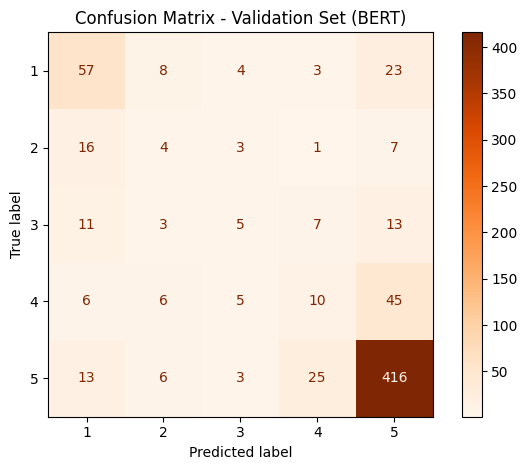

✅ Saved model to gdrive/MyDrive/./CE807-25-SU/TA assignment/model/2412780/model_2/bert_logistic_model.pkl


In [55]:
train_2(train_file, val_file, MODEL_2_DIRECTORY)

## Testing Method 2 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

**This function tests a trained BERT-based classification model on new data. It starts by reading the test file, then uses BERT to extract the [CLS] embeddings . After that, it loads the previously saved Logistic Regression model that was trained on BERT embeddings. Using this model, it predicts the labels for the test data and adds those predictions as a new column called out_label_model_2. It saves the updated test file with predictions to the specified output path**

In [56]:
# taken from https://chatgpt.com/share/687ede0e-bf48-8001-a219-59e3b2b94ddb

def test_2(test_file, model_dir,output_path):
    """
    Takes train_file, val_file and model_dir as input.
    It trained on the train_file datapoints, and validate on the val_file datapoints.
    While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
    After finishing the training, it saved the best model in the model_dir.

    ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory



    """

    ##########################################################################
    #                     TODO: Implement this function                      #
    ##########################################################################
    # Replace "pass" statement with your code

    # Read training and validation set data
    # test_df = pd.read_csv(test_file)
    # print('Testing set has', len(test_df),'data points')

    test_df = read_data(test_file)
    print('Testing set has', len(test_df),'data points')

    print("Extracting CLS embeddings from test text...")
    X_test = get_cls_embeddings(test_df['text'], tokenizer,bert_model)

    print("Loading trained model...")
    model_path = os.path.join(model_dir, 'bert_logistic_model.pkl')
    clf = joblib.load(model_path)

    print("Predicting labels...")
    predictions = clf.predict(X_test)
    test_df['out_label_model_2'] = predictions

    print("Saving predictions to test.csv...")
    test_df.to_csv(output_path, index=False)
    print("Predictions saved to:", output_path)



In [57]:
test_file = os.path.join(DATA_PATH, 'test.csv')
test_2(test_file, MODEL_2_DIRECTORY, test_file)


gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/test.csv has 1386 data points
Testing set has 1386 data points
Extracting CLS embeddings from test text...


Getting CLS Embeddings: 100%|██████████| 1386/1386 [12:40<00:00,  1.82it/s]

Loading trained model...
Predicting labels...
Saving predictions to test.csv...
Predictions saved to: gdrive/MyDrive/./CE807-25-SU/TA assignment/data/17/test.csv


## 2 Method  End


# Other Method/model Start

##Other Method/model End

**This code loads both models, picks 5 random validation examples, gets predictions from Method 1 (TF-IDF) and Method 2 (BERT), and prints the text, true rating, and both model predictions for easy comparison.**

In [58]:
#taken from https://chatgpt.com/share/687ede0e-bf48-8001-a219-59e3b2b94ddb
# Load models
model1 = joblib.load(os.path.join(MODEL_1_DIRECTORY, 'logistic_model1.pkl'))
vectorizer1 = joblib.load(os.path.join(MODEL_1_DIRECTORY, 'tfidf_vectorizer.pkl'))

model2 = joblib.load(os.path.join(MODEL_2_DIRECTORY, 'bert_logistic_model.pkl'))

# Prepare data
val_df_sample = val_df.sample(5, random_state=2412780).copy()
val_df_sample['processed'] = val_df_sample['text'].apply(preprocess_text)

# Get predictions from Method 1
X_val1 = vectorizer1.transform(val_df_sample['processed'])
val_df_sample['pred_m1'] = model1.predict(X_val1)

# Get predictions from Method 2
X_val2 = get_cls_embeddings(val_df_sample['text'], tokenizer,bert_model)
val_df_sample['pred_m2'] = model2.predict(X_val2)

# Display results
for i, row in val_df_sample.iterrows():
    print("🔹 Example:")
    print(f"Text: {row['text'][:300]}...")  # trim long reviews
    print(f"True Rating: {row['rating']}")
    print(f"Method 1 Prediction (TF-IDF): {row['pred_m1']}")
    print(f"Method 2 Prediction (BERT):   {row['pred_m2']}")
    print("-" * 80)


Getting CLS Embeddings: 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

🔹 Example:
Text: I compared the picture to my part and it was an exact match.  It was easy to install and it fixed my issue....
True Rating: 5
Method 1 Prediction (TF-IDF): 5
Method 2 Prediction (BERT):   5
--------------------------------------------------------------------------------
🔹 Example:
Text: Easy change, perfect fit. Very good filtration and odor capture with a greater airflow. Exelent choice for a performance and money...
True Rating: 5
Method 1 Prediction (TF-IDF): 5
Method 2 Prediction (BERT):   5
--------------------------------------------------------------------------------
🔹 Example:
Text: Exact match and shipped in a timely manner!...
True Rating: 5
Method 1 Prediction (TF-IDF): 5
Method 2 Prediction (BERT):   5
--------------------------------------------------------------------------------
🔹 Example:
Text: Speed is very slow. We wanted slower speed so our younger children could play but this was a little too slow. It was a great deal and we continue to use it but 

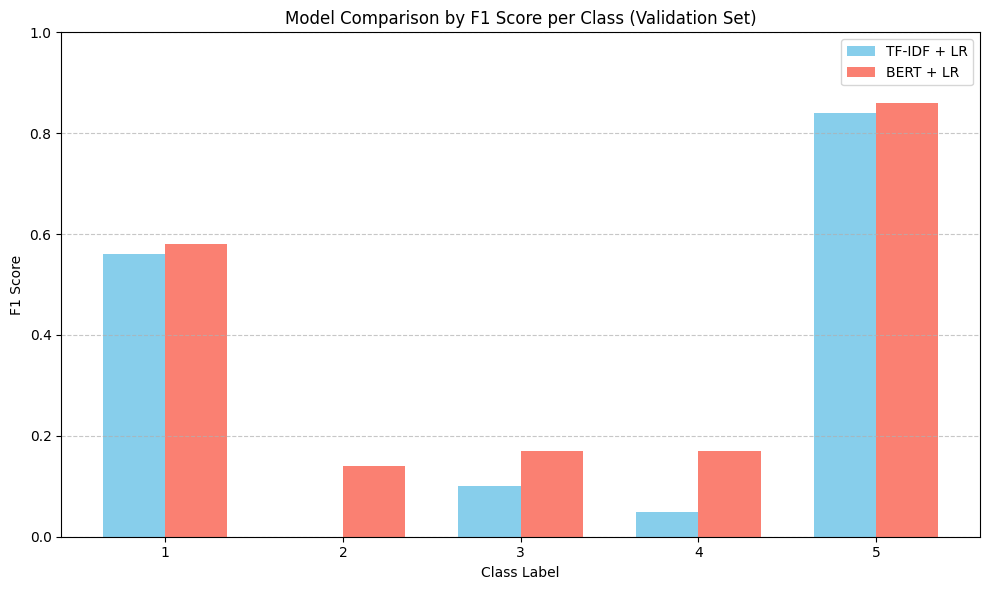

In [59]:
# Model 1 classification report (TF-IDF + Logistic Regression)
model1_report = {
    '1': {'f1-score': 0.56},
    '2': {'f1-score': 0.00},
    '3': {'f1-score': 0.10},
    '4': {'f1-score': 0.05},
    '5': {'f1-score': 0.84}
}

# Model 2 classification report (BERT + Logistic Regression)
model2_report = {
    '1': {'f1-score': 0.58},
    '2': {'f1-score': 0.14},
    '3': {'f1-score': 0.17},
    '4': {'f1-score': 0.17},
    '5': {'f1-score': 0.86}
}

# Extract class labels and f1 scores
classes = ['1', '2', '3', '4', '5']
f1_model1 = [model1_report[cls]['f1-score'] for cls in classes]
f1_model2 = [model2_report[cls]['f1-score'] for cls in classes]

x = np.arange(len(classes))
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, f1_model1, width, label='TF-IDF + LR', color='skyblue')
plt.bar(x + width/2, f1_model2, width, label='BERT + LR', color='salmon')

plt.xlabel('Class Label')
plt.ylabel('F1 Score')
plt.title('Model Comparison by F1 Score per Class (Validation Set)')
plt.xticks(x, classes)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


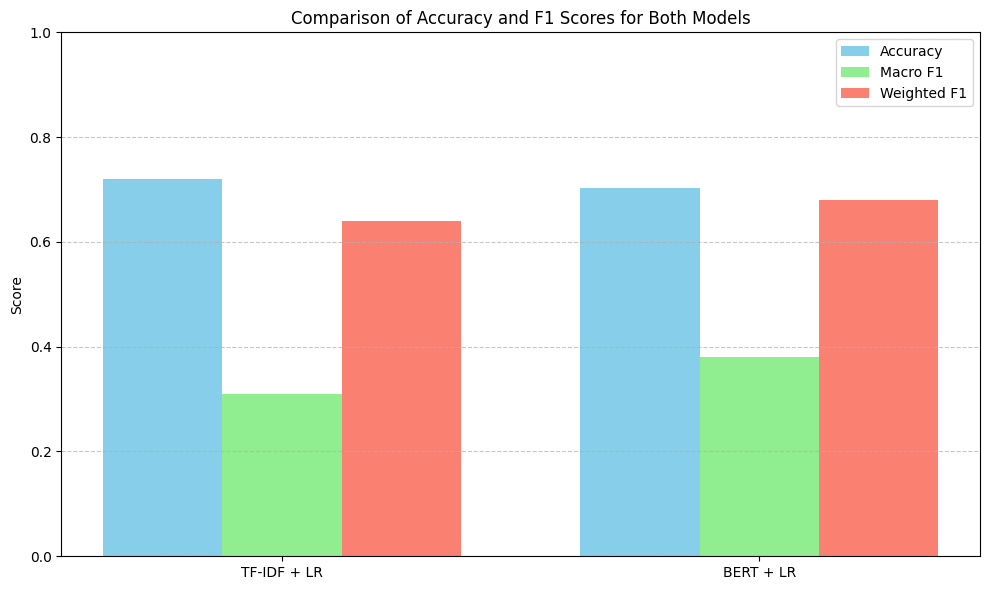

In [60]:

# ✅ Add your model performance values here
model_names = ['TF-IDF + LR', 'BERT + LR']

# Validation scores from your output above
accuracies = [0.72, 0.7029]
macro_f1s = [0.31, 0.38]
weighted_f1s = [0.64, 0.68]

# Bar plot setup
x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x, macro_f1s, width, label='Macro F1', color='lightgreen')
plt.bar(x + width, weighted_f1s, width, label='Weighted F1', color='salmon')

# Labels and formatting
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparison of Accuracy and F1 Scores for Both Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Refrences:*

**Hugging Face Transformers**

Citation:
Wolf, T., Debut, L., Sanh, V., Chaumond, J., Delangue, C., Moi, A., Cistac, P., Rault, T., Louf, R., Funtowicz, M., & Brew, J. (2020).
Transformers: State-of-the-Art Natural Language Processing.
In Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing: System Demonstrations (pp. 38–45).
https://doi.org/10.18653/v1/2020.emnlp-demos.6

**BERT**

Citation:
Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2019).
BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.
In Proceedings of NAACL-HLT (pp. 4171–4186).
https://doi.org/10.18653/v1/N19-1423

**Scikit-learn**
Citation:
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., & Duchesnay, E. (2011).
Scikit-learn: Machine Learning in Python.
Journal of Machine Learning Research, 12, 2825–2830.

**NLTK** (Natural Language Toolkit)
Citation:
Bird, S., Klein, E., & Loper, E. (2009).
Natural Language Processing with Python.
O’Reilly Media Inc.

**TQDM **(Progress Bars)
Citation:
da Costa-Luis, C. (2019).
tqdm: A Fast, Extensible Progress Meter for Python and CLI.
Journal of Open Source Software, 4(37), 1277.
https://doi.org/10.21105/joss.01277

code reference : https://chatgpt.com/share/687f28fc-4254-8001-b81e-d33fda4637e4